In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [6]:
import os
current_directory = os.getcwd()
print("Current directory:", current_directory)
os.chdir('D:\IT\sam\PlantVillage')
print("Current directory:", current_directory)

Current directory: D:\IT\sam\PlantVillage
Current directory: D:\IT\sam\PlantVillage


In [7]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# dataset = tf.keras.preprocessing.image_dataset_from_directory(
        
# )
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'D:\IT\sam\PlantVillage',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",

)

Found 18962 images belonging to 14 classes.


In [13]:
train_generator.class_indices

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato__Target_Spot': 10,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 11,
 'Tomato__Tomato_mosaic_virus': 12,
 'Tomato_healthy': 13}

In [14]:
class_names = list(train_generator.class_indices.keys())
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [16]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'D:\IT\sam\PlantVillage',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 18962 images belonging to 14 classes.


In [17]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'D:\IT\sam\PlantVillage',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 18962 images belonging to 14 classes.


In [18]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.5034573  0.45639846 0.45639846]
  [0.46865958 0.42160076 0.42160076]
  [0.5038431  0.45046157 0.45046157]
  ...
  [0.46798325 0.42092443 0.42092443]
  [0.4655587  0.41849986 0.41849986]
  [0.46313414 0.41607532 0.41607532]]

 [[0.5087105  0.46165168 0.46165168]
  [0.47189233 0.4248335  0.4248335 ]
  [0.49858993 0.44601652 0.44601652]
  ...
  [0.44932726 0.40226844 0.40226844]
  [0.44771087 0.40065205 0.40065205]
  [0.44609448 0.39903566 0.39903566]]

 [[0.51396376 0.46690488 0.46690488]
  [0.4751251  0.42806625 0.42806625]
  [0.49333674 0.4415715  0.4415715 ]
  ...
  [0.46902248 0.42196363 0.42196363]
  [0.4734675  0.42640868 0.42640868]
  [0.47791255 0.43085372 0.43085372]]

 ...

 [[0.5624616  0.50908005 0.5106003 ]
  [0.57377625 0.5212028  0.5235314 ]
  [0.5850908  0.5333257  0.53646237]
  ...
  [0.613328   0.57175905 0.58274025]
  [0.61322534 0.57400966 0.5779312 ]
  [0.5800002  0.54078454 0.5447061 ]]

 [[0.63989085 0.59283197 0.6006751 ]
  [0.6338294  0.5867706  0.59461373]


In [19]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 14

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [21]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [22]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=50,
)

Epoch 1/50
47/47 [==============================] - 106s 2s/step - loss: 2.4864 - accuracy: 0.1855 - val_loss: 2.3406 - val_accuracy: 0.1979
Epoch 2/50
47/47 [==============================] - 101s 2s/step - loss: 2.2622 - accuracy: 0.2440 - val_loss: 2.0841 - val_accuracy: 0.3177
Epoch 3/50
47/47 [==============================] - 103s 2s/step - loss: 2.0616 - accuracy: 0.3065 - val_loss: 1.9777 - val_accuracy: 0.3698
Epoch 4/50
47/47 [==============================] - 119s 3s/step - loss: 1.8907 - accuracy: 0.3570 - val_loss: 1.8717 - val_accuracy: 0.3698
Epoch 5/50
47/47 [==============================] - 106s 2s/step - loss: 1.8245 - accuracy: 0.3896 - val_loss: 1.6237 - val_accuracy: 0.4792
Epoch 6/50
47/47 [==============================] - 113s 2s/step - loss: 1.5875 - accuracy: 0.4641 - val_loss: 1.4697 - val_accuracy: 0.5208
Epoch 7/50
47/47 [==============================] - 103s 2s/step - loss: 1.5229 - accuracy: 0.4820 - val_loss: 1.3964 - val_accuracy: 0.5625
Epoch 8/50
47

In [23]:
scores = model.evaluate(test_generator)

593/593 [==============================] - 376s 635ms/step - loss: 0.3827 - accuracy: 0.8688


In [ ]:
# Accuracy & Loss Curves

In [24]:
history

In [25]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 47}

In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [27]:
type(history.history['loss'])
len(history.history['loss'])

50

In [28]:
history.history['loss'][:5]

[2.4864118099212646,
 2.2621870040893555,
 2.061601400375366,
 1.8906846046447754,
 1.8245463371276855]

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']44

In [30]:
val_acc

[0.1979166716337204,
 0.3177083432674408,
 0.3697916567325592,
 0.3697916567325592,
 0.4791666567325592,
 0.5208333134651184,
 0.5625,
 0.5,
 0.5520833134651184,
 0.5677083134651184,
 0.625,
 0.5885416865348816,
 0.59375,
 0.6666666865348816,
 0.6614583134651184,
 0.6979166865348816,
 0.6822916865348816,
 0.625,
 0.7552083134651184,
 0.734375,
 0.7447916865348816,
 0.7083333134651184,
 0.8072916865348816,
 0.765625,
 0.7916666865348816,
 0.78125,
 0.875,
 0.8020833134651184,
 0.8333333134651184,
 0.7864583134651184,
 0.84375,
 0.8333333134651184,
 0.7864583134651184,
 0.84375,
 0.78125,
 0.78125,
 0.8333333134651184,
 0.765625,
 0.84375,
 0.859375,
 0.859375,
 0.8541666865348816,
 0.8385416865348816,
 0.8645833134651184,
 0.8072916865348816,
 0.875,
 0.9010416865348816,
 0.875,
 0.890625,
 0.875]

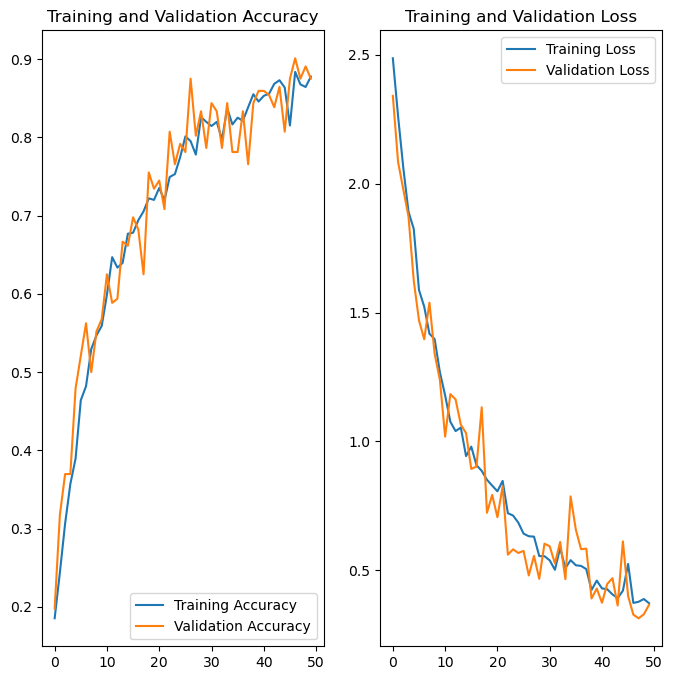

In [31]:
EPOCHS = 50

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [32]:
# Run prediction on a sample image

In [33]:
import numpy as np

First image to predict
Actual label: Tomato_Leaf_Mold
1/1 [==============================] - 1s 502ms/step
Predicted label: Tomato_Leaf_Mold


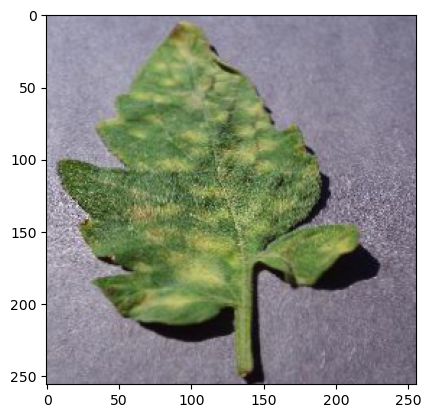

In [34]:
for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [35]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 31ms/step


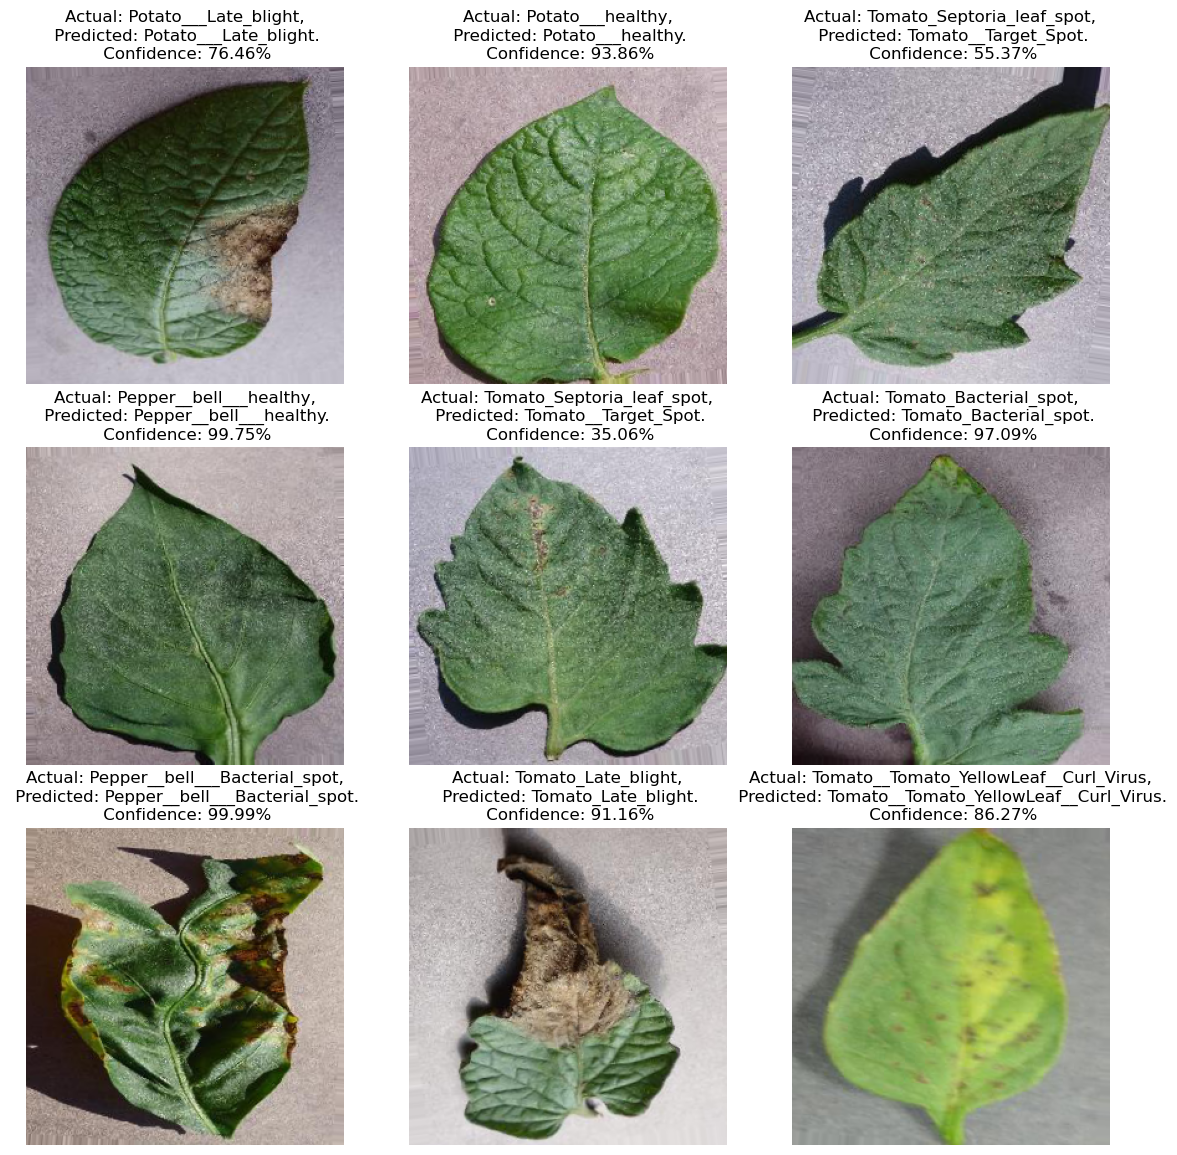

In [36]:
plt.figure(figsize=(14, 14))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [ ]:
# Saving the model

In [37]:
model_version=3

In [38]:
model.save(f"../models/version_{model_version}.h5")